# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

## Attribute information : https://archive.ics.uci.edu/ml/datasets/South+German+Credit

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
# Your code here! :)
df = pd.read_csv('GermanCredit.csv')
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
df.shape

(1000, 62)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [5]:
df.isnull().sum()

Duration                                  0
Amount                                    0
InstallmentRatePercentage                 0
ResidenceDuration                         0
Age                                       0
                                         ..
Housing.ForFree                           0
Job.UnemployedUnskilled                   0
Job.UnskilledResident                     0
Job.SkilledEmployee                       0
Job.Management.SelfEmp.HighlyQualified    0
Length: 62, dtype: int64

In [6]:
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [7]:
df.groupby(['Class', 'CheckingAccountStatus.lt.0']).size() 

Class  CheckingAccountStatus.lt.0
Bad    0                             165
       1                             135
Good   0                             561
       1                             139
dtype: int64

No handles with labels found to put in legend.


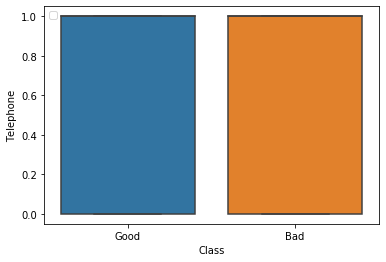

In [8]:
sb.boxplot(y=df.Telephone, x=df.Class)
plt.legend(loc="upper left")
plt.show()

In [9]:
df.groupby(['Class', 'Telephone']).size()

Class  Telephone
Bad    0            113
       1            187
Good   0            291
       1            409
dtype: int64

Telephone: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

In [10]:
df.groupby('Class').size()

Class
Bad     300
Good    700
dtype: int64

In [11]:
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [3]:
categorical_vars = df.describe(include=["object"]).columns
categorical_vars

Index(['Class'], dtype='object')

NameError: name 'categorical_vars' is not defined

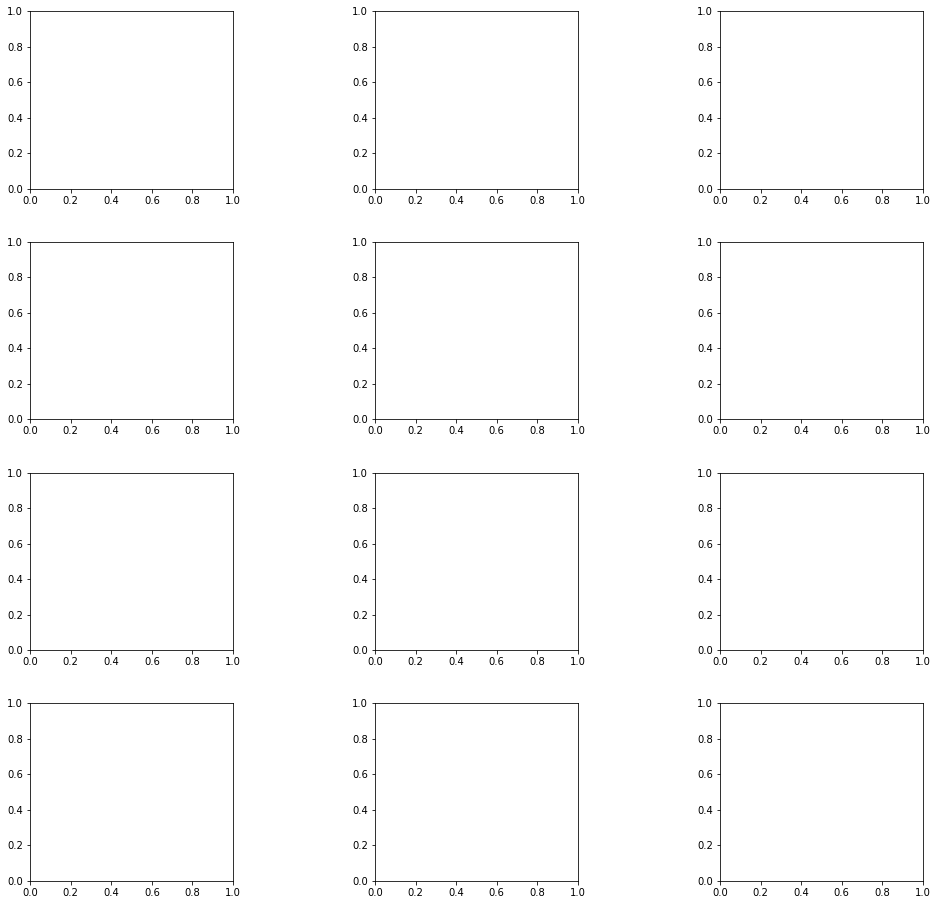

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sb.countplot(y = categorical_vars[i], data=df, ax=ax)

In [ ]:
# sns.pairplot(df, hue='Class', palette='hls')

In [14]:
corr = df.corr()

In [15]:
corr[0:50]

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
Duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.164718,0.138196,0.022244,...,0.035851,0.065688,-0.067602,-0.064417,-0.075169,0.189117,-0.044043,-1.812030e-01,0.055010,0.147515
Amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.276995,0.050050,-0.020912,...,0.039474,0.024262,-0.048292,-0.024611,-0.117497,0.201643,-0.027969,-1.617570e-01,-0.092636,0.319715
InstallmentRatePercentage,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.014413,0.090024,0.046917,...,-0.016150,0.056071,-0.016139,-0.091373,0.049922,0.040098,-0.087834,-5.723714e-02,0.042623,0.042805
ResidenceDuration,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.095359,0.054097,0.088350,...,0.014530,-0.054460,0.016704,0.167285,-0.297547,0.227044,-0.034545,9.064820e-03,-0.000657,0.004952
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.145259,0.006151,-0.011162,...,0.046552,-0.011080,-0.035362,-0.212620,0.006553,0.253058,0.059954,4.371237e-02,-0.148283,0.127605
NumberExistingCredits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.065553,0.009717,-0.029195,...,0.042190,0.023496,-0.050290,-0.058070,0.041386,0.011406,0.059582,-1.039203e-02,-0.001471,-0.010906
NumberPeopleMaintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.014753,-0.077071,0.059041,...,0.075519,0.009335,-0.072220,-0.063033,-0.027579,0.118047,-0.007723,1.450658e-01,-0.106737,-0.015096
Telephone,-0.164718,-0.276995,-0.014413,-0.095359,-0.145259,-0.065553,0.014753,1.000000,-0.107401,0.067149,...,-0.010863,-0.029003,0.025433,0.049524,0.036275,-0.114036,0.040124,2.537205e-01,0.061289,-0.385706
ForeignWorker,0.138196,0.050050,0.090024,0.054097,0.006151,0.009717,-0.077071,-0.107401,1.000000,-0.057751,...,0.002190,0.043530,-0.025623,-0.032849,-0.018960,0.068205,-0.042834,-8.741177e-02,0.047292,0.051858
CheckingAccountStatus.lt.0,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,0.067149,-0.057751,1.000000,...,0.012405,0.011886,-0.017494,0.093310,-0.125705,0.067961,-0.000428,2.354213e-02,-0.002879,-0.022427


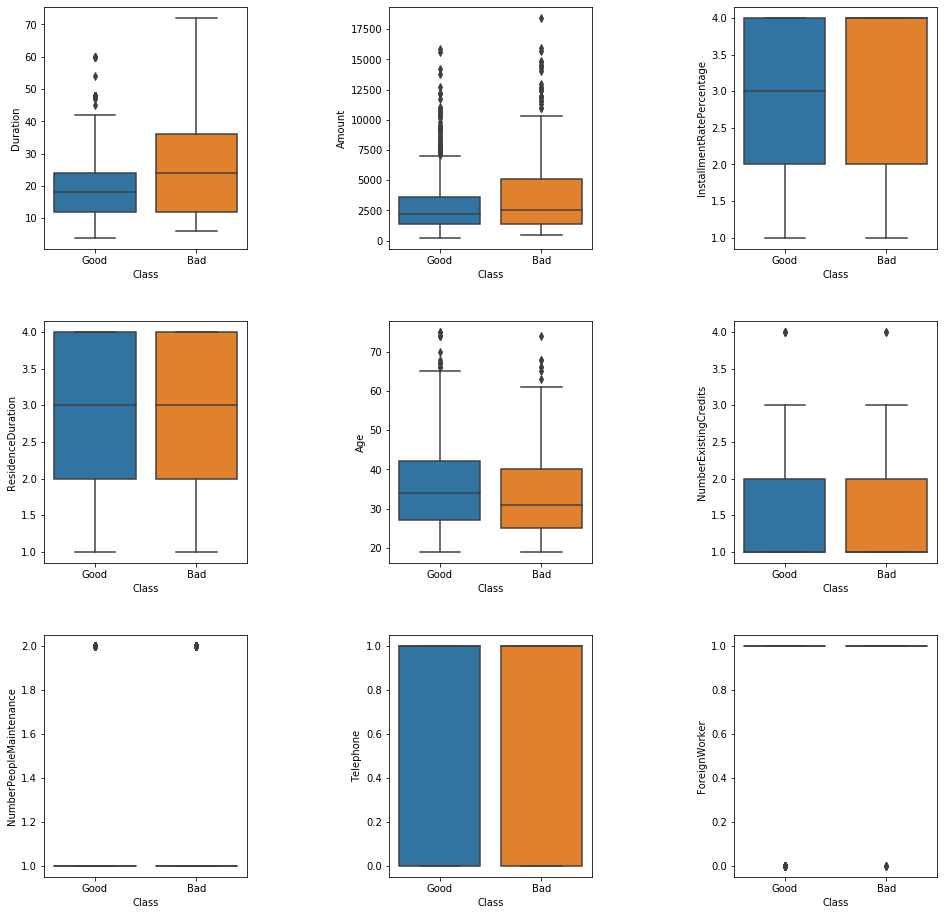

In [16]:
import warnings
warnings.filterwarnings("ignore")
import time

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# from pandas.tools.plotting import scatter_matrix
numerical_vars = df.describe().columns

fig, axes = plt.subplots(3, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 15:
        ax.set_visible(False)
        continue
    sb.boxplot(y = numerical_vars[i], x = 'Class', data=df, ax=ax)

In [7]:
# X = df.drop(columns = 'Class')
X = df.drop(['Class', 'Purpose.Vacation'], axis = 1)
y = df.Class
print('X shape:', X.shape)
print('y shape:', y.shape)

encode_class = lambda x: 1 if x=='Good' else 0
y = pd.Series(list(map(encode_class, df['Class'])), index=df.index)
y.head()

X shape: (1000, 60)
y shape: (1000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)

In [9]:
clf =  DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.657


In [15]:
# df5 = y_pred.append(y_test)
df_y_pred = pd.DataFrame({'y_pred': y_pred})

In [16]:
len(y_test)

300

In [17]:
len(y_pred)

300

In [18]:
# make duplicate indices!
y_test.index = df_y_pred.index

In [19]:
pd.concat([y_test, df_y_pred], axis=1)

,Class,y_pred
0,Good,Good
1,Good,Bad
2,Good,Good
3,Bad,Bad
4,Good,Good
...,...,...
295,Good,Good
296,Good,Bad
297,Bad,Bad
298,Good,Bad


In [10]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
clf2 = DecisionTreeClassifier(max_depth=3, random_state= 10)
clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf2.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.687


In [22]:
clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [23]:
clf3 = DecisionTreeClassifier(max_depth=4, random_state=11)
clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf3.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.647


In [24]:
clf4 = DecisionTreeClassifier(max_depth=5, random_state=12)
clf4.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf4.score(X_test, y_test)))

Accuracy on training set: 0.817
Accuracy on test set: 0.680


In [25]:
clf5 = DecisionTreeClassifier(max_depth=6, random_state=13)
clf5.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf5.score(X_test, y_test)))

Accuracy on training set: 0.847
Accuracy on test set: 0.680


In [26]:
features = [v for i,v in enumerate(X.columns)]
features[:5]

['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age']

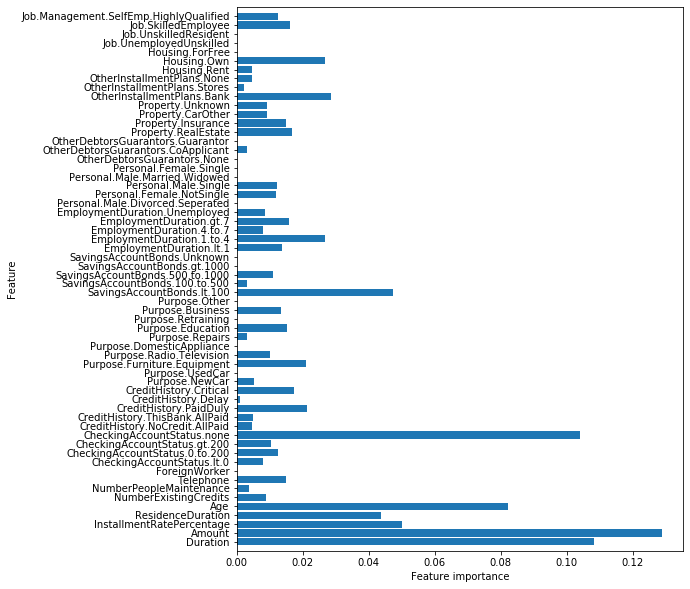

In [27]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,10))
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf)
# plt.savefig('Decision Tree feature_importance')

In [28]:
df.groupby(['Class', 'CheckingAccountStatus.none']).size()

Class  CheckingAccountStatus.none
Bad    0                             254
       1                              46
Good   0                             352
       1                             348
dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 49,  49],
       [ 54, 148]])

In [30]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.48      0.50      0.49        98
        Good       0.75      0.73      0.74       202

    accuracy                           0.66       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.66      0.66      0.66       300



In [32]:
# Precision TP/(TP+FP)
# False Positive: Type I error
143/(143+48)

0.7486910994764397

In [33]:
# Recall or sensitivity TP/(TP+FN)
# False Negative: Type II error
146/(146+59)

0.7121951219512195

In [34]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': list(range(2, 30)), 
    'min_samples_split': [2, 3, 4],
    'max_features' : ['auto', 'sqrt', 'log2'],
     }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=35), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1512 out of 1512 | elapsed:    5.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=35,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [35]:
print(classification_report(y_test, grid_search_cv.predict(X_test)))

              precision    recall  f1-score   support

         Bad       0.55      0.16      0.25        98
        Good       0.70      0.94      0.80       202

    accuracy                           0.68       300
   macro avg       0.62      0.55      0.53       300
weighted avg       0.65      0.68      0.62       300



In [36]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

In [37]:
# How do I know the first prob is for Good or Bad??? over 0.5--> Good else Bad
grid_search_cv.predict_proba(X_test)[:10]

array([[0.22727273, 0.77272727],
       [0.25949367, 0.74050633],
       [0.12972973, 0.87027027],
       [0.25949367, 0.74050633],
       [0.12972973, 0.87027027],
       [0.25949367, 0.74050633],
       [0.22727273, 0.77272727],
       [0.25949367, 0.74050633],
       [0.25949367, 0.74050633],
       [0.375     , 0.625     ]])

In [38]:
grid_search_cv.predict(X_test)[:10]

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good'], dtype=object)

In [39]:
grid_search_cv.score(X_test, y_test)

0.6833333333333333

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [24]:
#### Your code here! :)
from dtreeviz.trees import dtreeviz

classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

classifier.fit(X_train, y_train)

viz = dtreeviz(classifier, X_train, y_train, target_name='Class',
               feature_names=X_train.columns,
               orientation='TD', 
               class_names=['Bad','Good']
              )

viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', '/tmp/DTreeViz_38.svg', '/tmp/DTreeViz_38'], make sure the Graphviz executables are on your systems' PATH

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=3, random_state=30) #n_estimatorsint: default=100
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [41]:
print(clf_rf.predict(X_test)[:10])

['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']


In [42]:
clf_rf.score(X_test,y_test)
print("Accuracy on training set: {:.3f}".format(clf_rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_rf.score(X_test, y_test)))

Accuracy on training set: 0.723
Accuracy on test set: 0.680


In [43]:
depth = [2,3,4,5,6,7,8,9,10,15,30,35]

for d in depth:
    clf_rf2 = RandomForestClassifier(max_depth=d, random_state=40)
    clf_rf2.fit(X_train, y_train)
    score = clf_rf2.score(X_test,y_test)
    
    print('For max depth =', d, end="")
    print(", accuracy on training set: {:.3f}".format(clf_rf2.score(X_train, y_train)), end="")
    print(" and accuracy on test set: {:.3f}".format(clf_rf2.score(X_test, y_test)))

For max depth = 2, accuracy on training set: 0.711 and accuracy on test set: 0.673
For max depth = 3, accuracy on training set: 0.731 and accuracy on test set: 0.683
For max depth = 4, accuracy on training set: 0.760 and accuracy on test set: 0.707
For max depth = 5, accuracy on training set: 0.791 and accuracy on test set: 0.717
For max depth = 6, accuracy on training set: 0.849 and accuracy on test set: 0.707
For max depth = 7, accuracy on training set: 0.883 and accuracy on test set: 0.717
For max depth = 8, accuracy on training set: 0.934 and accuracy on test set: 0.710
For max depth = 9, accuracy on training set: 0.953 and accuracy on test set: 0.720
For max depth = 10, accuracy on training set: 0.973 and accuracy on test set: 0.723
For max depth = 15, accuracy on training set: 1.000 and accuracy on test set: 0.743
For max depth = 30, accuracy on training set: 1.000 and accuracy on test set: 0.727
For max depth = 35, accuracy on training set: 1.000 and accuracy on test set: 0.727


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [66]:
# X = df.drop(columns = 'Class')
X = df.drop(['Class', 'Purpose.Vacation'], axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [45]:
forest.base_estimator_

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [46]:
# for tree in forest.estimators_:
#     print(tree.feature_importances_)

In [47]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
std
importances

array([0.05258508, 0.04805771, 0.03286636, 0.03269003, 0.04047057,
       0.02123834, 0.01382319, 0.02233967, 0.00518821, 0.04342734,
       0.02257285, 0.00884006, 0.0499485 , 0.01180817, 0.01070623,
       0.01606068, 0.01084353, 0.02403517, 0.02184354, 0.01046777,
       0.01694352, 0.01612353, 0.00244823, 0.0055043 , 0.0094198 ,
       0.0013756 , 0.0118761 , 0.0022956 , 0.02298441, 0.01106166,
       0.00738102, 0.00685579, 0.01532614, 0.01738166, 0.01947169,
       0.01515939, 0.01612533, 0.01159028, 0.00856592, 0.01944882,
       0.02035586, 0.01055471, 0.        , 0.01193974, 0.00727113,
       0.00952615, 0.01962081, 0.01710307, 0.01908278, 0.0130805 ,
       0.01522083, 0.0079904 , 0.01945692, 0.01360089, 0.01637416,
       0.00764373, 0.00312983, 0.01453946, 0.01973916, 0.01661809])

In [48]:
importances

array([0.05258508, 0.04805771, 0.03286636, 0.03269003, 0.04047057,
       0.02123834, 0.01382319, 0.02233967, 0.00518821, 0.04342734,
       0.02257285, 0.00884006, 0.0499485 , 0.01180817, 0.01070623,
       0.01606068, 0.01084353, 0.02403517, 0.02184354, 0.01046777,
       0.01694352, 0.01612353, 0.00244823, 0.0055043 , 0.0094198 ,
       0.0013756 , 0.0118761 , 0.0022956 , 0.02298441, 0.01106166,
       0.00738102, 0.00685579, 0.01532614, 0.01738166, 0.01947169,
       0.01515939, 0.01612533, 0.01159028, 0.00856592, 0.01944882,
       0.02035586, 0.01055471, 0.        , 0.01193974, 0.00727113,
       0.00952615, 0.01962081, 0.01710307, 0.01908278, 0.0130805 ,
       0.01522083, 0.0079904 , 0.01945692, 0.01360089, 0.01637416,
       0.00764373, 0.00312983, 0.01453946, 0.01973916, 0.01661809])

In [49]:
len(importances)

60

In [50]:
np.min(importances)

0.0

In [51]:
np.max(importances)

0.052585081727043965

In [52]:
np.argsort(importances)

array([42, 25, 27, 22, 56,  8, 23, 31, 44, 30, 55, 51, 38, 11, 24, 45, 19,
       41, 14, 16, 29, 37, 13, 26, 43, 49, 53,  6, 57, 35, 50, 32, 15, 21,
       36, 54, 59, 20, 47, 33, 48, 39, 52, 34, 46, 58, 40,  5, 18,  7, 10,
       28, 17,  3,  2,  4,  9,  1, 12,  0])

In [53]:
indices = np.argsort(importances)[::-1] # to make a copy of the same list in reverse order - desc
indices

array([ 0, 12,  1,  9,  4,  2,  3, 17, 28, 10,  7, 18,  5, 40, 58, 46, 34,
       52, 39, 48, 33, 47, 20, 59, 54, 36, 21, 15, 32, 50, 35, 57,  6, 53,
       49, 43, 26, 13, 37, 29, 16, 14, 41, 19, 45, 24, 11, 38, 51, 55, 30,
       44, 31, 23,  8, 56, 22, 27, 25, 42])

In [54]:
X.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Retraining',
       'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100',
       'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000',
       'SavingsAccountBonds.gt.1000', 'SavingsAccountBonds.Unknown',
       'EmploymentDuration.lt.1', 'EmploymentDuration.1.to.4',
       'EmploymentDuration.4.to

In [55]:
names = [X.columns[i] for i in indices]
names

['Duration',
 'CheckingAccountStatus.none',
 'Amount',
 'CheckingAccountStatus.lt.0',
 'Age',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'CreditHistory.Critical',
 'SavingsAccountBonds.lt.100',
 'CheckingAccountStatus.0.to.200',
 'Telephone',
 'Purpose.NewCar',
 'NumberExistingCredits',
 'Personal.Male.Single',
 'Job.SkilledEmployee',
 'Property.RealEstate',
 'EmploymentDuration.1.to.4',
 'OtherInstallmentPlans.None',
 'Personal.Female.NotSingle',
 'Property.CarOther',
 'EmploymentDuration.lt.1',
 'Property.Insurance',
 'Purpose.Furniture.Equipment',
 'Job.Management.SelfEmp.HighlyQualified',
 'Housing.Own',
 'EmploymentDuration.gt.7',
 'Purpose.Radio.Television',
 'CreditHistory.PaidDuly',
 'SavingsAccountBonds.Unknown',
 'OtherInstallmentPlans.Bank',
 'EmploymentDuration.4.to.7',
 'Job.UnskilledResident',
 'NumberPeopleMaintenance',
 'Housing.Rent',
 'Property.Unknown',
 'OtherDebtorsGuarantors.None',
 'Purpose.Business',
 'CreditHistory.NoCredit.AllPaid',
 'EmploymentDurat

In [56]:
X.shape

(1000, 60)

In [57]:
importances

array([0.05258508, 0.04805771, 0.03286636, 0.03269003, 0.04047057,
       0.02123834, 0.01382319, 0.02233967, 0.00518821, 0.04342734,
       0.02257285, 0.00884006, 0.0499485 , 0.01180817, 0.01070623,
       0.01606068, 0.01084353, 0.02403517, 0.02184354, 0.01046777,
       0.01694352, 0.01612353, 0.00244823, 0.0055043 , 0.0094198 ,
       0.0013756 , 0.0118761 , 0.0022956 , 0.02298441, 0.01106166,
       0.00738102, 0.00685579, 0.01532614, 0.01738166, 0.01947169,
       0.01515939, 0.01612533, 0.01159028, 0.00856592, 0.01944882,
       0.02035586, 0.01055471, 0.        , 0.01193974, 0.00727113,
       0.00952615, 0.01962081, 0.01710307, 0.01908278, 0.0130805 ,
       0.01522083, 0.0079904 , 0.01945692, 0.01360089, 0.01637416,
       0.00764373, 0.00312983, 0.01453946, 0.01973916, 0.01661809])

In [58]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[f], importances[indices[f]]))

Feature ranking:
1. feature Duration (0.052585)
2. feature CheckingAccountStatus.none (0.049949)
3. feature Amount (0.048058)
4. feature CheckingAccountStatus.lt.0 (0.043427)
5. feature Age (0.040471)
6. feature InstallmentRatePercentage (0.032866)
7. feature ResidenceDuration (0.032690)
8. feature CreditHistory.Critical (0.024035)
9. feature SavingsAccountBonds.lt.100 (0.022984)
10. feature CheckingAccountStatus.0.to.200 (0.022573)
11. feature Telephone (0.022340)
12. feature Purpose.NewCar (0.021844)
13. feature NumberExistingCredits (0.021238)
14. feature Personal.Male.Single (0.020356)
15. feature Job.SkilledEmployee (0.019739)
16. feature Property.RealEstate (0.019621)
17. feature EmploymentDuration.1.to.4 (0.019472)
18. feature OtherInstallmentPlans.None (0.019457)
19. feature Personal.Female.NotSingle (0.019449)
20. feature Property.CarOther (0.019083)
21. feature EmploymentDuration.lt.1 (0.017382)
22. feature Property.Insurance (0.017103)
23. feature Purpose.Furniture.Equipment

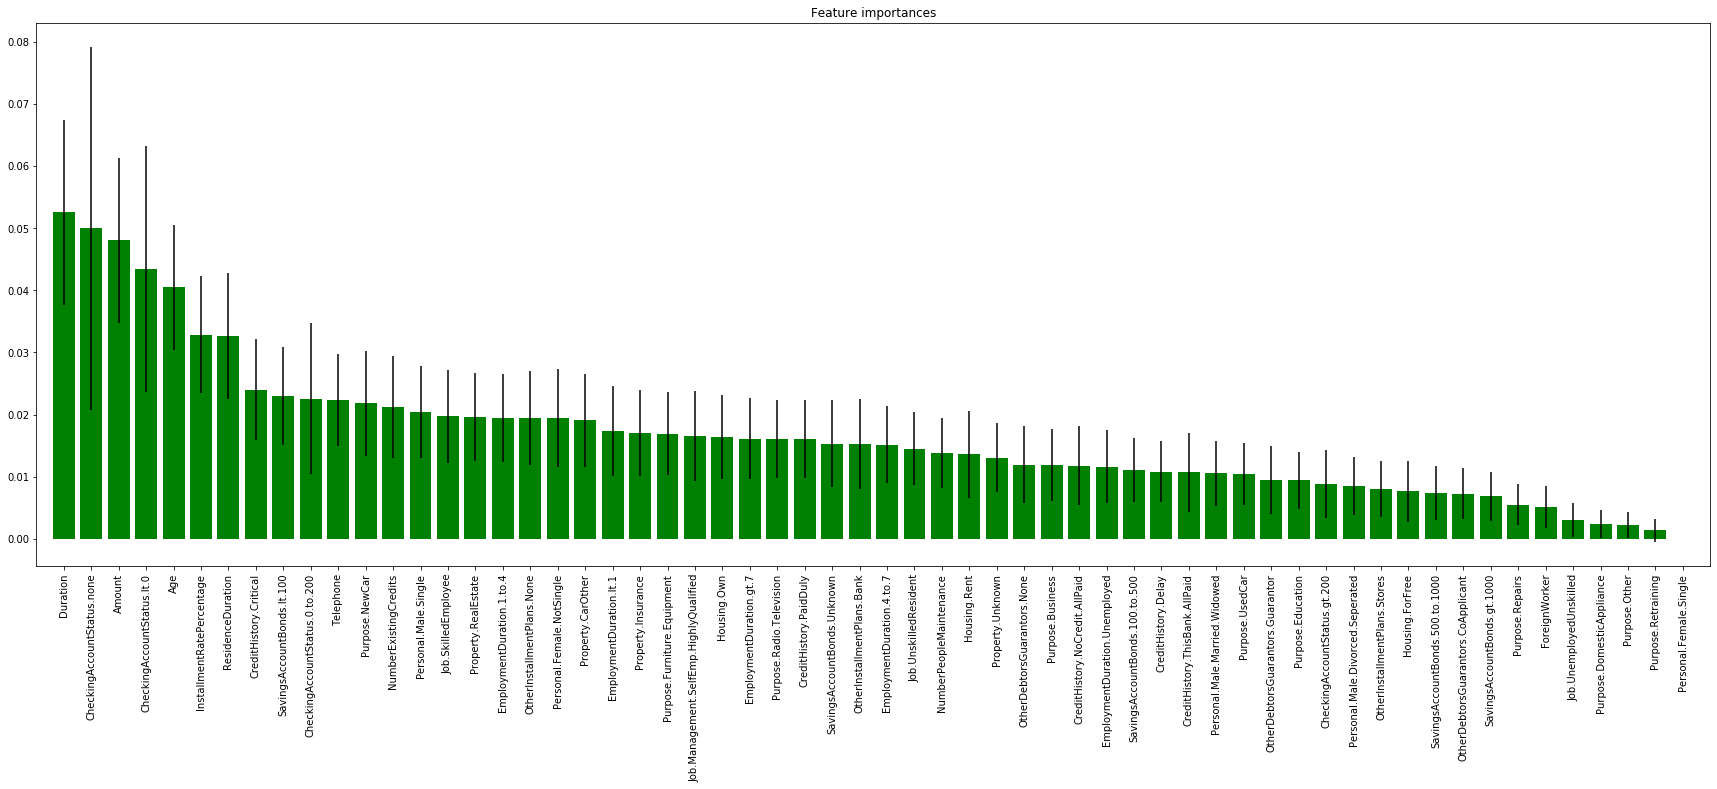

In [59]:
# Plot the impurity-based feature importances of the forest
# plt.figsize
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(names, importances[indices],
        color="green", yerr=std[indices], align="center")
# plt.xticks(X.columns)
plt.xlim([-1, X.shape[1]])
plt.xticks(rotation = 90)
plt.show()

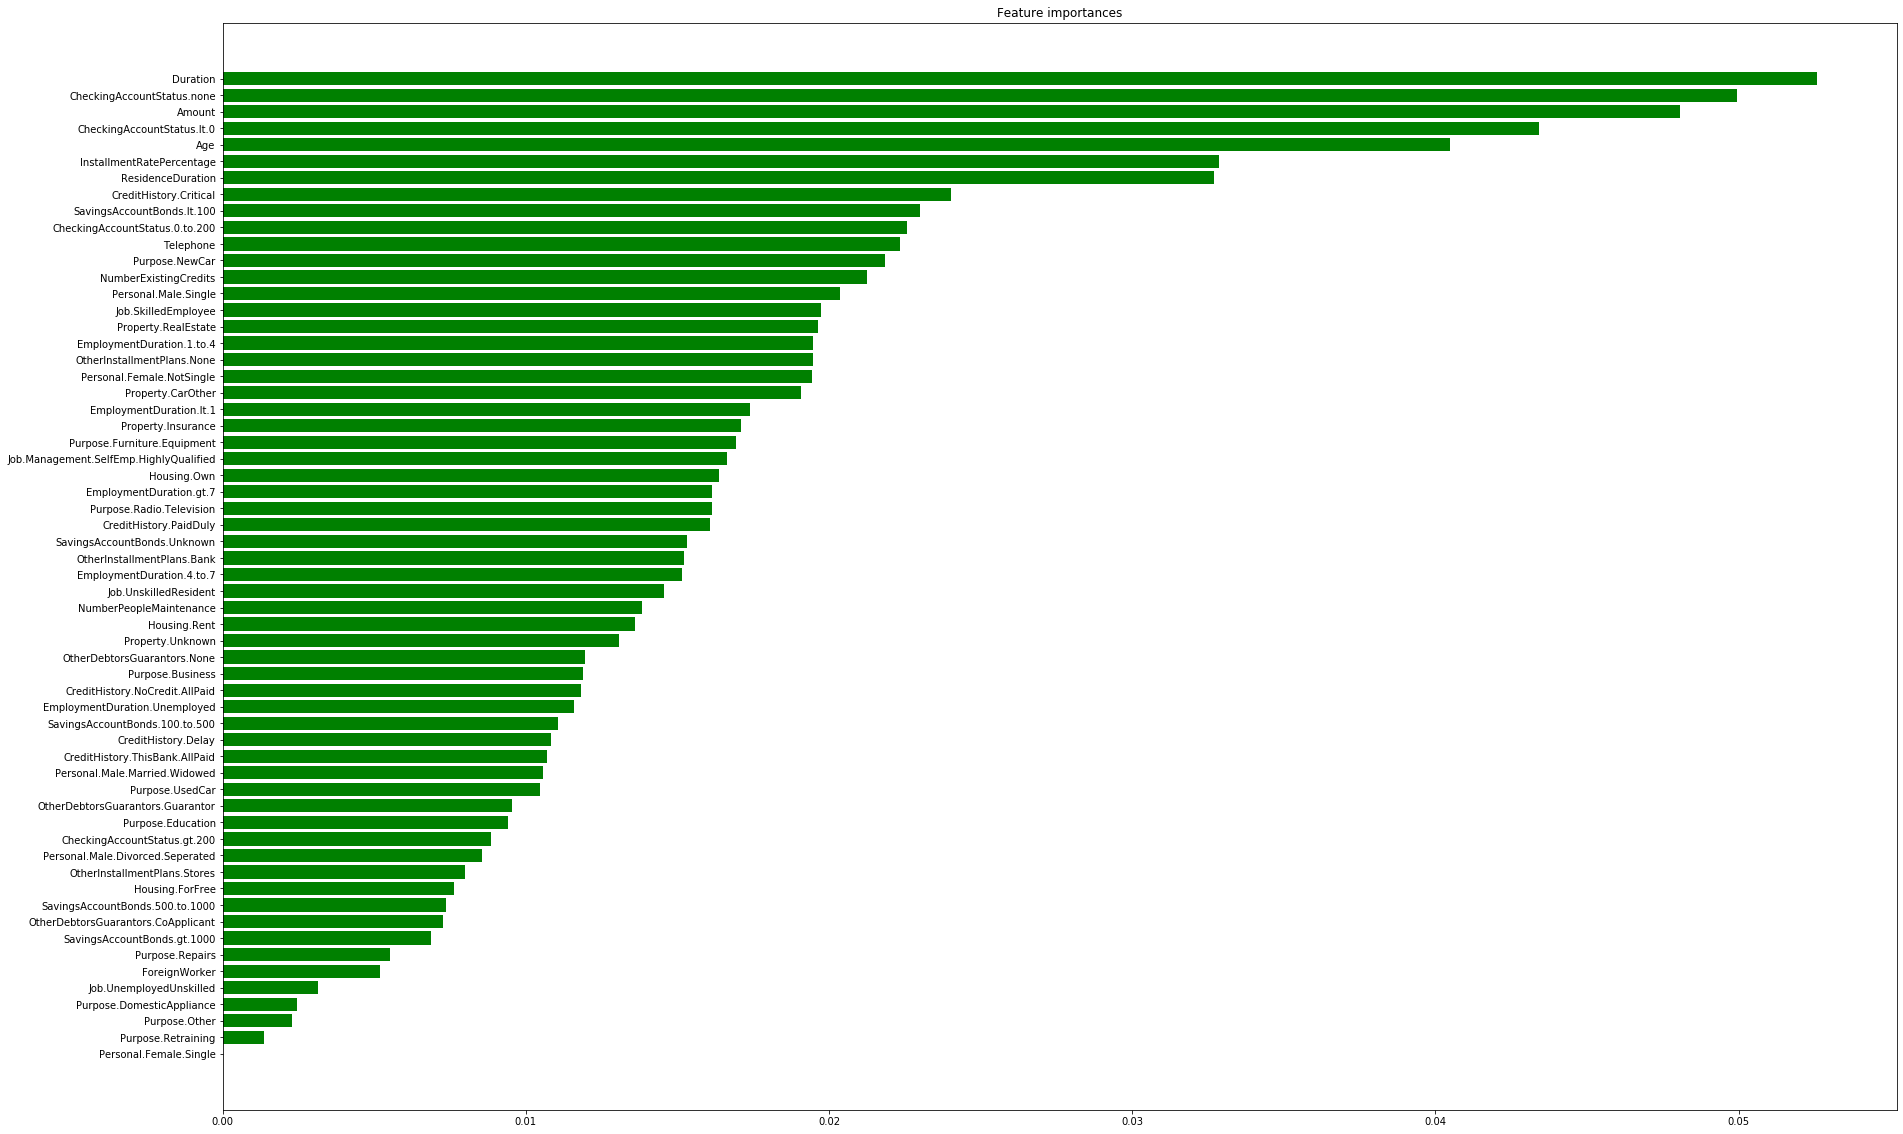

In [60]:
y_pos = np.arange(len(names))[::-1]

plt.figure(figsize=(30,20))
plt.title("Feature importances")
plt.barh(y_pos, importances[indices],
        color="g", align="center")
plt.yticks(y_pos, names)
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
# ! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [73]:
# Your code here!
import pdpbox
from pdpbox import pdp

pdp_credit = pdp.pdp_interact(forest,df['Class'], X)
pdp.pdp_interact_plot(pdp_credit, ['CheckingAccountStatus.none','Duration', 'Amount'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

TypeError: pdp_interact() missing 1 required positional argument: 'features'

In [72]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
# ! conda install -c anaconda py-xgboost

In [30]:
# ! conda install -c conda-forge catboost

In [31]:
# ! conda install -c conda-forge lightgbm

## Prepare dataset

In [3]:
X = df.drop(['Class', 'Purpose.Vacation'], axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)

In [40]:
X.dtypes

Duration                                  int64
Amount                                    int64
InstallmentRatePercentage                 int64
ResidenceDuration                         int64
Age                                       int64
NumberExistingCredits                     int64
NumberPeopleMaintenance                   int64
Telephone                                 int64
ForeignWorker                             int64
CheckingAccountStatus.lt.0                int64
CheckingAccountStatus.0.to.200            int64
CheckingAccountStatus.gt.200              int64
CheckingAccountStatus.none                int64
CreditHistory.NoCredit.AllPaid            int64
CreditHistory.ThisBank.AllPaid            int64
CreditHistory.PaidDuly                    int64
CreditHistory.Delay                       int64
CreditHistory.Critical                    int64
Purpose.NewCar                            int64
Purpose.UsedCar                           int64
Purpose.Furniture.Equipment             

In [46]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [143]:
df_result = pd.DataFrame(columns =['Algorithm', 'Precision', 'Recall', 'Accuracy'])
df_result.head()

,Algorithm,Precision,Recall,Accuracy


## Gradient Boosting Machine for Classification

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

# fit the model on the whole dataset
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# By default
# n_estimators=100
# max_depth=3
# learning_rate=0.1

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
print("Accuracy on training set: {:.3f}".format(gbc.score(X_train, y_train)), end="")
print(" and accuracy on test set: {:.3f}".format(gbc.score(X_test, y_test)))

Accuracy on training set: 0.921 and accuracy on test set: 0.717


In [21]:
from sklearn.metrics import precision_recall_fscore_support as score

def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators= est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Good', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision,3), round(recall,3), 
        round((y_pred == y_test).sum() / len(y_pred), 3)))

In [8]:
for n_est in [50, 100, 150]:
    for max_depth in [3]:
        for lr in [0.001, 0.005, 0.01, .05, .1 ]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 50 / Depth: 3 / LR: 0.005 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.672 / Recall: 0.995 / Accuracy: 0.67
Est: 50 / Depth: 3 / LR: 0.05 ---- Precision: 0.732 / Recall: 0.946 / Accuracy: 0.73
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.739 / Recall: 0.896 / Accuracy: 0.717
Est: 100 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 100 / Depth: 3 / LR: 0.005 ---- Precision: 0.672 / Recall: 0.995 / Accuracy: 0.67
Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.69 / Recall: 0.98 / Accuracy: 0.69
Est: 100 / Depth: 3 / LR: 0.05 ---- Precision: 0.756 / Recall: 0.906 / Accuracy: 0.74
Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.744 / Recall: 0.876 / Accuracy: 0.713
Est: 150 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 150 / Depth: 3 / LR: 0.005 ---- Precision: 0.685 / Reca

In [144]:
df_result.loc[0]= ['GB', 0.739 , 0.896, 0.717]
df_result
# Question:  Which one to select? The highest accuracy or lowest recall?

,Algorithm,Precision,Recall,Accuracy
0,GB,0.739,0.896,0.717


## XGBoost

In [9]:
from xgboost import XGBClassifier

# fit the model on the whole dataset
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 74.00%


In [11]:
def train_XG(est, max_depth, lr):
    xg = XGBClassifier(n_estimators= est, max_depth=max_depth, learning_rate=lr)
    xg_model = xg.fit(X_train, y_train)
    y_pred = xg_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Good', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision,3), round(recall,3), 
        round((y_pred == y_test).sum() / len(y_pred), 3)))

In [12]:
for n_est in [50, 100, 150]:
    for max_depth in [3]:
        for lr in [0.001, 0.005, 0.01, .05, .1 ]:
            train_XG(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.001 ---- Precision: 0.721 / Recall: 0.871 / Accuracy: 0.687
Est: 50 / Depth: 3 / LR: 0.005 ---- Precision: 0.721 / Recall: 0.871 / Accuracy: 0.687
Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.729 / Recall: 0.866 / Accuracy: 0.693
Est: 50 / Depth: 3 / LR: 0.05 ---- Precision: 0.723 / Recall: 0.906 / Accuracy: 0.703
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.748 / Recall: 0.896 / Accuracy: 0.727
Est: 100 / Depth: 3 / LR: 0.001 ---- Precision: 0.721 / Recall: 0.871 / Accuracy: 0.687
Est: 100 / Depth: 3 / LR: 0.005 ---- Precision: 0.729 / Recall: 0.866 / Accuracy: 0.693
Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.725 / Recall: 0.901 / Accuracy: 0.703
Est: 100 / Depth: 3 / LR: 0.05 ---- Precision: 0.744 / Recall: 0.906 / Accuracy: 0.727
Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.755 / Recall: 0.886 / Accuracy: 0.73
Est: 150 / Depth: 3 / LR: 0.001 ---- Precision: 0.721 / Recall: 0.871 / Accuracy: 0.687
Est: 150 / Depth: 3 / LR: 0.005 ---- Precision

In [145]:
df_result.loc[1]= ['XGB', 0.767, 0.861, 0.73]
df_result

,Algorithm,Precision,Recall,Accuracy
0,GB,0.739,0.896,0.717
1,XGB,0.767,0.861,0.730


## CatBoost for Classification

In [93]:
%%time
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=100,
                       custom_loss=['Accuracy'],
                       random_seed=40,
#                        verbose = 50,
                       logging_level = 'Silent',
                       learning_rate = 0.1
                       )
cb.fit(
    X_train, y_train, 
    cat_features = categorical_features_indices, 
    eval_set = (X_test, y_test), 
    logging_level = 'Verbose', # for text output
#     plot=True
)

0:	learn: 0.6575932	test: 0.6649450	best: 0.6649450 (0)	total: 3.04ms	remaining: 301ms
1:	learn: 0.6188325	test: 0.6360066	best: 0.6360066 (1)	total: 7.41ms	remaining: 363ms
2:	learn: 0.6085262	test: 0.6278399	best: 0.6278399 (2)	total: 8.83ms	remaining: 285ms
3:	learn: 0.5950717	test: 0.6191134	best: 0.6191134 (3)	total: 12.7ms	remaining: 305ms
4:	learn: 0.5806426	test: 0.6074171	best: 0.6074171 (4)	total: 14.1ms	remaining: 268ms
5:	learn: 0.5633436	test: 0.6015187	best: 0.6015187 (5)	total: 18.1ms	remaining: 284ms
6:	learn: 0.5480543	test: 0.5933308	best: 0.5933308 (6)	total: 21.9ms	remaining: 291ms
7:	learn: 0.5359107	test: 0.5858129	best: 0.5858129 (7)	total: 25.7ms	remaining: 295ms
8:	learn: 0.5253008	test: 0.5830171	best: 0.5830171 (8)	total: 29.8ms	remaining: 301ms
9:	learn: 0.5104800	test: 0.5768003	best: 0.5768003 (9)	total: 33.7ms	remaining: 303ms
10:	learn: 0.5033776	test: 0.5748102	best: 0.5748102 (10)	total: 37.6ms	remaining: 304ms
11:	learn: 0.4904516	test: 0.5694107	best

The best accuracy value of 0.0.5396125249 was acheived on 97 boosting step

In [86]:
cb.best_iteration_

67

In [89]:
cb.best_score_

{'learn': {'Accuracy': 0.9442857142857143, 'Logloss': 0.24559458125851458},
 'validation': {'Accuracy': 0.72, 'Logloss': 0.5345953227315006}}

In [90]:
cb.load_model

<bound method CatBoost.load_model of <catboost.core.CatBoostClassifier object at 0x7f13e6433d90>>

In [91]:
print("Accuracy on training set: {:.3f}".format(cb.score(X_train, y_train)), end="")
print(" and accuracy on test set: {:.3f}".format(cb.score(X_test, y_test)))

Accuracy on training set: 0.876 and accuracy on test set: 0.707


In [114]:
%%time

params = {'iterations': 100,
           'custom_loss': ['Accuracy'],
           'random_seed': np.random.randint(100),
           'logging_level':'Silent',
}

def train_CB(lr):
    cb1 = CatBoostClassifier(**params, learning_rate = lr)
    cb1_model = cb1.fit(X_train, y_train, 
                        cat_features = categorical_features_indices, 
                        eval_set = (X_test, y_test)
                       )
    y_pred = cb1_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Good', average='binary')
    print('LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        lr, round(precision,3), round(recall,3), 
        round((y_pred == y_test).sum() / len(y_pred), 3)))
    
for lr in [0.001, 0.005, 0.01, .05, .1 ]:
            train_CB(lr)

LR: 0.001 ---- Precision: 0.681 / Recall: 0.995 / Accuracy: 0.683
LR: 0.005 ---- Precision: 0.684 / Recall: 0.995 / Accuracy: 0.687
LR: 0.01 ---- Precision: 0.694 / Recall: 0.99 / Accuracy: 0.7
LR: 0.05 ---- Precision: 0.717 / Recall: 0.941 / Accuracy: 0.71
LR: 0.1 ---- Precision: 0.753 / Recall: 0.906 / Accuracy: 0.737
CPU times: user 1.93 s, sys: 201 ms, total: 2.13 s
Wall time: 1.34 s


In [146]:
df_result.loc[2]= ['CatBoost', 0.753, 0.906, 0.737]
df_result

,Algorithm,Precision,Recall,Accuracy
0,GB,0.739,0.896,0.717
1,XGB,0.767,0.861,0.730
2,CatBoost,0.753,0.906,0.737


## LightGBM for Classification

In [35]:
from lightgbm import LGBMClassifier

# fit the model on the whole dataset
lgb = LGBMClassifier(max_depth=3)
lgb.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
print("Accuracy on training set: {:.3f}".format(lgb.score(X_train, y_train)), end="")
print(" and accuracy on test set: {:.3f}".format(lgb.score(X_test, y_test)))

Accuracy on training set: 0.866 and accuracy on test set: 0.850


In [29]:
def train_LGB(est, max_depth, lr):
    lgb = LGBMClassifier(n_estimators= est, max_depth=max_depth, learning_rate=lr)
    lgb_model = lgb.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Good', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision,3), round(recall,3), 
        round((y_pred == y_test).sum() / len(y_pred), 3)))

In [26]:
for n_est in [50, 100, 150]:
    for max_depth in [3]:
        for lr in [0.001, 0.005, 0.01, .05, .1 ]:
            train_LGB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 50 / Depth: 3 / LR: 0.005 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 50 / Depth: 3 / LR: 0.05 ---- Precision: 0.716 / Recall: 0.926 / Accuracy: 0.703
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.745 / Recall: 0.896 / Accuracy: 0.723
Est: 100 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 100 / Depth: 3 / LR: 0.005 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.686 / Recall: 0.995 / Accuracy: 0.69
Est: 100 / Depth: 3 / LR: 0.05 ---- Precision: 0.742 / Recall: 0.896 / Accuracy: 0.72
Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.764 / Recall: 0.881 / Accuracy: 0.737
Est: 150 / Depth: 3 / LR: 0.001 ---- Precision: 0.673 / Recall: 1.0 / Accuracy: 0.673
Est: 150 / Depth: 3 / LR: 0.005 ---- Precision: 0.676 / Rec

In [147]:
df_result.loc[3]= ['LGBM', 0.773,  0.861, 0.737]
df_result

,Algorithm,Precision,Recall,Accuracy
0,GB,0.739,0.896,0.717
1,XGB,0.767,0.861,0.730
2,CatBoost,0.753,0.906,0.737
3,LGBM,0.773,0.861,0.737
